**NAME : Meen, Sadika Afrin** <br>
**ID   : 19-41178-2** <br>
**SEC  : C** 
**{CVPR}**

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:

import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob


In [5]:


train_path = r'/content/drive/MyDrive/CVPR/dataset/train'
test_path = r'/content/drive/MyDrive/CVPR/dataset/test'

X_train = []
y_train = []
X_test = []
y_test = []

categories = os.listdir(train_path)
print(categories)


category_count = 0
for category in categories:
    category_count += 1
    print('Reading category:',category_count)
    train_category_path = os.path.join(train_path,category)
    test_category_path = os.path.join(test_path,category)
    train_images = os.listdir(train_category_path)
    test_images = os.listdir(test_category_path)
    #print(images)
    
    # Reading Train Data
    for image in train_images:
        #print(os.path.join(category_path,image))
        X_train.append(cv2.imread(os.path.join(train_category_path,image)))
        y_train.append(category)
        
    # Reading Test Data
    for image in test_images:
        #print(os.path.join(category_path,image))
        X_test.append(cv2.imread(os.path.join(test_category_path,image)))
        y_test.append(category)
        
print('Done')

['dog', 'deer', 'bird', 'airplane', 'cat', 'automobile']
Reading category: 1
Reading category: 2
Reading category: 3
Reading category: 4
Reading category: 5
Reading category: 6
Done


**Train Data Checking**

23595
23595
<class 'numpy.ndarray'>
(32, 32, 3)
[[[ 40  44  63]
  [ 30  34  52]
  [ 39  42  57]
  ...
  [213 214 204]
  [177 180 165]
  [179 185 168]]

 [[114 118 137]
  [ 98 100 118]
  [ 83  86 100]
  ...
  [227 226 222]
  [201 204 195]
  [179 185 174]]

 [[200 201 221]
  [197 199 217]
  [186 187 201]
  ...
  [225 219 230]
  [220 220 226]
  [185 188 192]]

 ...

 [[  9  37  24]
  [  5  33  20]
  [  4  29  19]
  ...
  [ 60 115 120]
  [ 55 112 114]
  [ 59 119 119]]

 [[ 24  60  44]
  [ 23  58  44]
  [ 22  56  45]
  ...
  [ 53 113 113]
  [ 52 116 110]
  [ 57 122 113]]

 [[ 63 102  86]
  [ 64 103  88]
  [ 65 103  91]
  ...
  [ 55 119 114]
  [ 48 113 104]
  [ 39 108  95]]]
automobile


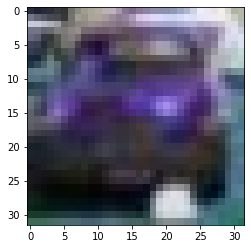

In [7]:
print(len(X_train))
print(len(y_train))
print(type(X_train[20000]))
print(X_train[20000].shape)
print(X_train[20000])
print(y_train[20000])
plt.figure()
plt.imshow(X_train[20000])

**Test Data Checking**

6000
6000
<class 'numpy.ndarray'>
(32, 32, 3)
[[[ 49  65  82]
  [ 47  64  83]
  [ 42  63  85]
  ...
  [ 59  79 110]
  [ 60  80 111]
  [ 61  81 112]]

 [[ 49  65  82]
  [ 46  63  82]
  [ 42  63  85]
  ...
  [ 58  78 109]
  [ 59  79 110]
  [ 59  79 110]]

 [[ 48  63  82]
  [ 45  62  83]
  [ 41  62  84]
  ...
  [ 57  78 109]
  [ 58  79 110]
  [ 59  80 111]]

 ...

 [[ 35  58  96]
  [ 35  58  96]
  [ 36  59  97]
  ...
  [ 49  76 110]
  [ 50  78 109]
  [ 50  78 109]]

 [[ 33  56  94]
  [ 34  57  95]
  [ 35  57  98]
  ...
  [ 51  78 112]
  [ 52  80 111]
  [ 53  81 112]]

 [[ 34  57  95]
  [ 35  58  96]
  [ 37  59 100]
  ...
  [ 54  81 115]
  [ 55  83 114]
  [ 56  84 115]]]
dog
<class 'list'>


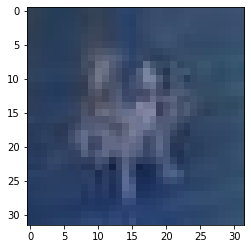

In [8]:
print(len(X_test))
print(len(y_test))
print(type(X_test[500]))
print(X_test[500].shape)
print(X_test[500])
print(y_test[500])
plt.figure()
plt.imshow(X_test[500])
print(type(y_test))

**Manhattan Distance**

In [4]:
def calc_manhattan_distance(v1,v2):
  distance = 0
  for i in range(len(v1)):
    distance += abs( int(v1[i]) - int(v2[i]) )
    return distance

**Computing Manhattan Distance**

In [9]:
distances = []
completed = 0

print('Computing Manhattan distance ===>')

for test_image in X_test:
    manhattan_dist = []
    for train_image in X_train:
        manhattan_dist.append(np.sum(abs(test_image.flatten()-train_image.flatten())))
    distances.append(manhattan_dist)
    completed += 1
    if completed%1000 == 0:
        print(f'Completed: {int(completed/100)}%')
        
print('Completed..')

Computing Manhattan distance ===>
Completed: 10%
Completed: 20%
Completed: 30%
Completed: 40%
Completed: 50%
Completed: 60%
Completed..


**Distance Checking**

In [10]:
print(len(distances))
print(len(distances[1]))
print(min(distances[1]))

6000
23595
238081


**KNN**

In [11]:
min_value_index = np.argmin(distances[1])
print(min_value_index)
print(distances[1][min_value_index])
print('Predicted:',y_train[min_value_index])
print('Actual:',y_test[1])

269
238081
Predicted: dog
Actual: dog


**Accuracy**

In [12]:
correct = 0
wrong = 0

for i,distance in enumerate(distances):
    min_value_index = np.argmin(distance)
    #print(y_test[i])
    if y_test[i] == y_train[min_value_index]:
        correct += 1
    else:
        wrong += 1
        
print('Correct:',correct)
print('Wrong',wrong)
accuracy = (correct/len(distances))*100
print(f'Accuracy: {accuracy}%')

Correct: 2061
Wrong 3939
Accuracy: 34.35%


K=1-20

In [14]:
accuracies = []
k_values = range(1,21)

for k in k_values:  
    correct = 0
    wrong = 0
    for i,distance in enumerate(distances):
        sorted_dist = np.argsort(distance)
        #print(sorted_dist[:5])
        predictions = []
        for dist in sorted_dist[:k]:
            predictions.append(y_train[dist])
        #print(y_test[i])
        predicted = max(predictions, key=predictions.count)
        #print('predictions:',predictions)
        #print('Predicted:',predicted)
        if predicted == y_test[i]:
            correct += 1
        else:
            wrong += 1

    accuracy = (correct/len(distances))*100
    accuracies.append(accuracy)
    

Ploting Graph

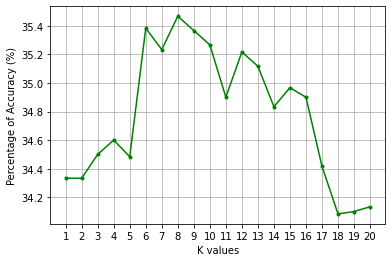

In [15]:
plt.figure()
plt.plot(k_values,accuracies,'g.-')
plt.xlabel('K values')
plt.ylabel('Percentage of Accuracy (%)')
plt.xticks(k_values)
plt.grid(True)
plt.show()